# Lesson 2: Introduction to git, optimization, and spikes

## Lesson goals:

1. Install PyCharm and configure a project with Github integration for this code repository
2. git commands: pull, stash, add, commit, merge, push
3. Introduction to function optimization with scipy.optimize
4. Perform bounded parameter optimization on the input resistance of a NEURON section
5. Introduction to NMODL, the language used to specify ion channel mechanisms in NEURON
6. Insert "active" voltage-dependent "Hodgkin-Huxley" ion channels
7. Challenge 1: Measure and plot an "f-I curve"
8. Challenge 2: Simultaneously optimize both somatic input resistance and the slope of the f-I curve.

## 1. Install PyCharm and configure a project with Github integration for this code repository

https://www.jetbrains.com/pycharm/download/#section=mac

### In Pycharm:
- Top Menu --> File --> New Project...
- Set "Location" to directory containing nrnpy_tutorial repository
- Set "Python Interpreter" to "Existing Interpreter" and point to python executable in anaconda bin directory
- "Create"
- "Create from existing sources"
- Open project in "New Window"
- Let PyCharm find importable python modules and do some indexing
<br><br>
- Top Menu --> PyCharm --> Preferences...
- Project:nrnpy_tutorial --> Python Interpreter
- Click settings gear on top right --> "Show All"
- Click directory hierarchy icon on bottom "Show paths for the selected interpreter"
- If not already in the list, make sure to "Add" the "parent directory" that contains the subdirectory with your cloned git repository
- Back in the Preferences panel --> Tools --> Terminal
- Make sure the "Shell path" points to your preferred bash executable (e.g. /bin/zsh)
- Apply and close Preferences
<br><br>
- Click the "Terminal" tab on the bottom
- `which python3` to make sure PyCharm Terminal agrees with the system terminal configuration
<br><br>
- Top Menu --> VCS --> Git --> Remotes
- Make sure a remote location with the name "origin" points to the URL of the nrnpy_tutorial on GitHub

## 2. git commands: pull, stash, add, commit, merge, push

- `git pull origin master` - download any changes to the branch with the name "master" from the remote location named "origin" since you cloned the repository, or since the last time you "pulled"
    - PyCharm will warn you if you have made local changes that would be over-written by the pull operation
- `git stash` - if you want the remote changes to replace your local copy, you can "stash" the changes. On the next pull, your local changes will be over-written
- `git add` - if you want a file that you created to be tracked by git, you can right-click on the filename and "add" it the list of tracked files
- `git commit` - if you have made changes to one or more tracked files locally and you want to update the remote repository, you need to "commit" them to the record. This is just a local operation and does not yet change the upstream remote origin. You can add a message to describe the changes in this commit, and attribute yourself as the author of the changes.
- `git pull` - if in your latest commits, you have made changes to the same lines of the same files as another collaborator, and you try to "pull" remote changes, PyCharm will detect the conflict and give you the opportunity to decide line-by-line which version you would like to use going forward. This is called a "merge" operation.
- `git push` - Once you have merged, commit your changes again. Then you are ready to "push" those commits to the remote origin.

### Don't worry, everything you do with git is (usually) reversible!

## 3. Introduction to function optimization with scipy.optimize

Resource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Let's say we have a function that takes an array of free parameters, and produces a single float output:

<IPython.core.display.Javascript object>


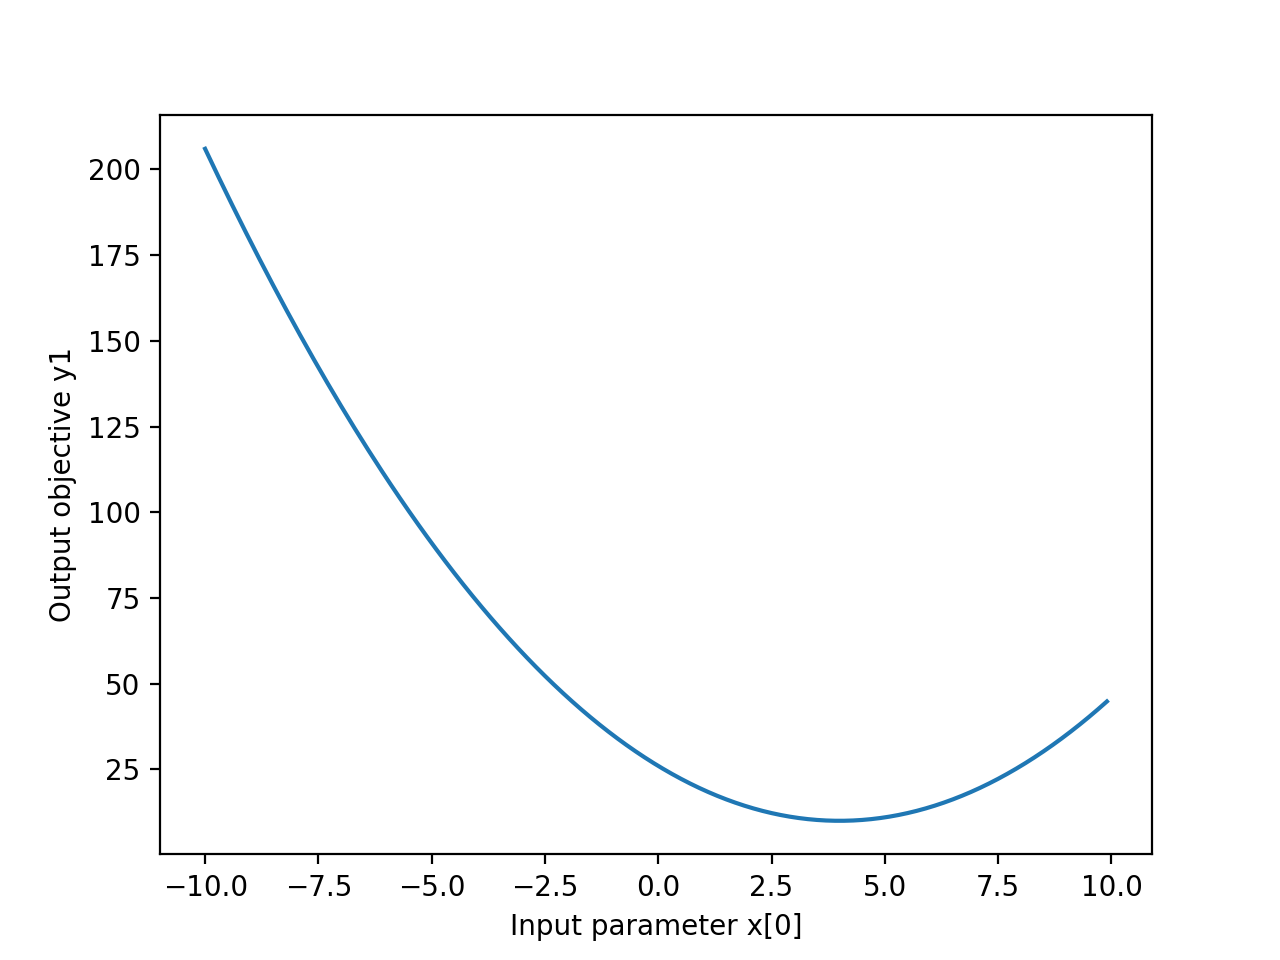

In [3]:
def y1(x):
    """
    The argument 'x' is an array of length 1.
    """
    y = (x[0] - 4) ** 2. + 10.
    return y

test_x = np.arange(-10., 10., 0.1)
test_y1 = [y1([xi]) for xi in test_x]
plt.figure()
plt.plot(test_x, test_y1)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y1')
plt.show()

Since this is a simple function, we could obtain the global minimum by graphing the function, or by solving the equation analytically. But when functions are complex, numerical optimization methods become useful tools to search for approximate local minimums.

scipy.optimize.minimize is a general interface that can use many different algorithms to search for input parameters that minimize a provided function. 

In [4]:
from scipy.optimize import minimize
# initial guess for the input parameter
x0 = 0.

result = minimize(y1, [x0], options={'disp': True})

Optimization terminated successfully.
         Current function value: 10.000000
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4


In [5]:
print(result)

      fun: 10.000000000000002
 hess_inv: array([[0.49999999]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.99999995])


Well that was easy. But how do we know what parameters it tested? We'll have to manually keep track by appending the values to a global variable:

Optimization terminated successfully.
         Current function value: 10.000000
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4


<IPython.core.display.Javascript object>


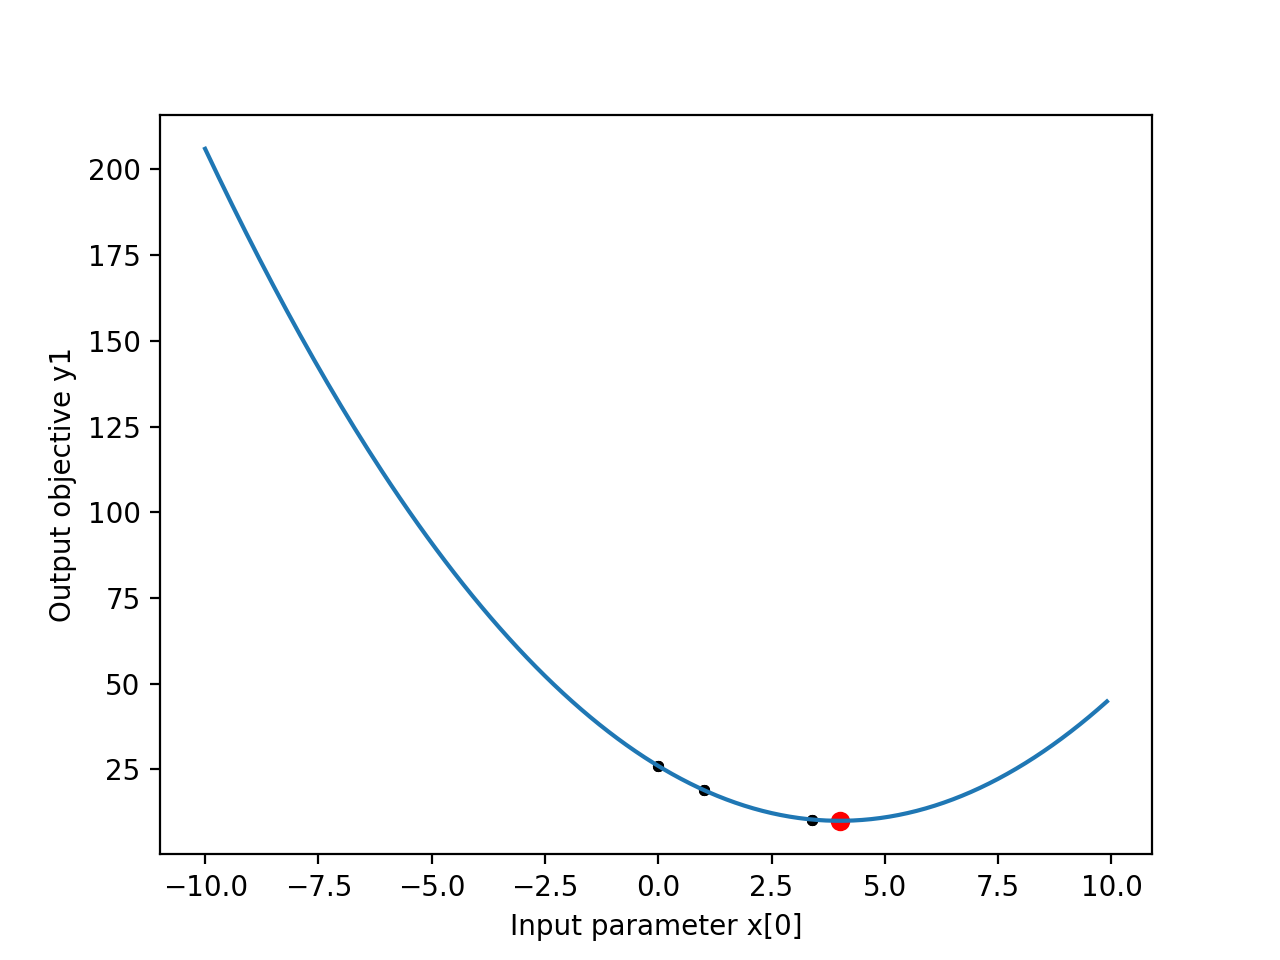

[3.99999995] 10.000000000000002


In [6]:
x_history = []
y_history = []

def y1(x):
    """
    The argument 'x' is an array of length 1.
    """
    x_history.append(x)
    y = (x[0] - 4) ** 2. + 10.
    y_history.append(y)
    return y

result = minimize(y1, [x0], options={'disp': True})

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], yi, marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y1)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y1')
plt.show()

print(result.x, result.fun)

What if there is no true global minimum?

In [7]:
def y2(x):
    """
    The argument 'x' is an array of length 1.
    """
    x_history.append(x)
    y = np.exp(-x[0])
    y_history.append(y)
    return y

test_y2 = [y2([xi]) for xi in test_x]

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 17
         Function evaluations: 54
         Gradient evaluations: 18


<IPython.core.display.Javascript object>


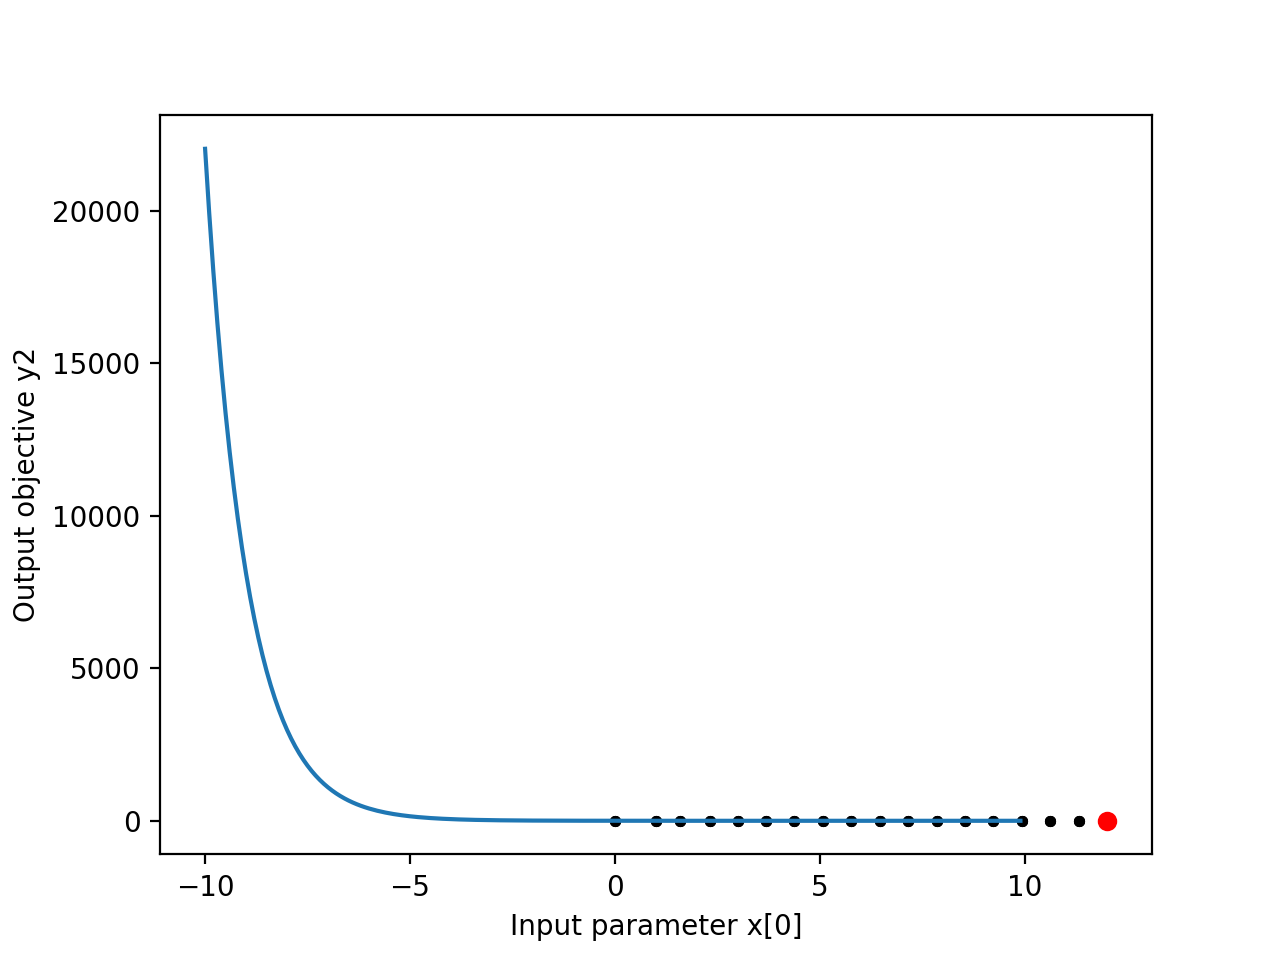

[12.01100351] 6.076975025331183e-06


In [8]:
x_history = []
y_history = []
result = minimize(y2, [x0], options={'disp': True})

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y2)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y2')
plt.show()

print(result.x, result.fun)

If there is no true global minimum, minimize will find a local one up to some error tolerance.

In [ ]:
x_history = []
y_history = []
result = minimize(y2, [x0], options={'disp': True}, tol=0.1)

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y2)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y2')
plt.show()

print(result.x, result.fun)

In [ ]:
x_history = []
y_history = []
result = minimize(y2, [x0], options={'disp': True}, tol=1e-12)

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y2)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y2')
plt.show()

print(result.x, result.fun)

What if the function has multiple local minima?

In [ ]:
def y3(x):
    """
    The argument 'x' is an array of length 1.
    """
    x_history.append(x)
    y = np.sin(x[0])
    y_history.append(y)
    return y

test_y3 = [y3([xi]) for xi in test_x]

In [ ]:
x_history = []
y_history = []
result = minimize(y3, [x0], options={'disp': True})

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y3)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y3')
plt.show()

print(result.x, result.fun)

If the function has multiple local minima, the search can be limited to a bounded range of parameters:

In [ ]:
x_history = []
y_history = []
result = minimize(y3, [x0], options={'disp': True}, method='L-BFGS-B', bounds=((-1., 10.),))

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y3)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y3')
plt.show()

print(result.x, result.fun)

So gradient-based approaches do not always find the desired local minimum! Let's try a non-gradient-based algorithm:

In [ ]:
x_history = []
y_history = []
result = minimize(y3, [x0], options={'disp': True}, method='Nelder-Mead', bounds=((-1., 10.),))

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y3)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y3')
plt.show()

print(result.x, result.fun)

But this algorithm does not respect bounds. We can manually implement them by hard coding our function to be optimized to return a very large error value when parameters are out of bounds:

In [ ]:
def y3(x):
    """
    The argument 'x' is an array of length 1.
    """
    for xi, bi in zip(x, bounds):
        if not bi[0] <= xi <= bi[1]:
            return 1e9
    x_history.append(x)
    y = np.sin(x[0])
    y_history.append(y)
    return y

In [9]:
x_history = []
y_history = []
bounds=((-1., 10.),)

result = minimize(y3, [x0], options={'disp': True}, method='Nelder-Mead')

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y3)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y3')
plt.ylim((-2., 2.))
plt.show()

print(result.x, result.fun)

NameError: name 'y3' is not defined

This algorithm, also known as "Simplex", only wants to look locally. It's a good "polisher", but we need a better way to search the whole bounded range. "Basinhopping" or "Simulated annealing" is good for this:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping

In every iteration, this algorithm will generate new parameters by taking "steps" from a previously visited point in the parameter space. Then it will try to use a local minimizer to polish the result. The initial stepsize can be specified, and with every iteration, the "temperature" decreases, which reduces the stepsize and decreases the error tolerance.

In [10]:
from scipy.optimize import basinhopping

In [ ]:
x_history = []
y_history = []
bounds=((-1., 10.),)

stepsize = 0.5 * (bounds[0][1] - bounds[0][0])

result = basinhopping(y3, [x0], minimizer_kwargs={'method': 'Nelder-Mead'}, stepsize=stepsize, disp=True)

plt.figure()
for xi, yi in zip(x_history, y_history):
    plt.scatter(xi[0], [yi], marker='.', c='k')
plt.scatter(result.x[0], result.fun, marker='o', c='r')
plt.plot(test_x, test_y3)
plt.xlabel('Input parameter x[0]')
plt.ylabel('Output objective y3')
plt.ylim((-2., 2.))
plt.show()

print(result.x, result.fun)

## 4. Perform bounded parameter optimization on the input resistance of a NEURON section

In [11]:
from neuron import h
h.load_file('stdrun.hoc')

1.0

In [12]:
soma = h.Section()
soma.L = 20.
soma.diam = 20.
soma.insert('pas')

soma_pas_g0 = soma(0.5).pas.g

h.tstop = 400.
v_init = -65.
h.v_init = v_init
soma(0.5).pas.e = v_init

t = h.Vector()
soma_voltage = h.Vector()
t.record(h._ref_t, h.dt)  # record the time base
soma_voltage.record(soma(0.5)._ref_v, h.dt)  # record the voltage across the membrane in a segment

step_current_stim = h.IClamp(soma(0.5))
step_current_stim.amp = -0.05  # amplitude in nanoAmps
step_current_stim.dur = 200.  # duration in milliseconds
step_current_stim.delay = 200.  # start time of current injection

In [13]:
def get_R_inp(t, v, i_amp, baseline_window=(195., 200.),  measurement_window=(395., 400.)):
    baseline_indexes = np.where((baseline_window[0] <= t) & (t < baseline_window[1]))
    measurement_indexes = np.where((measurement_window[0] <= t) & (t < measurement_window[1]))
    baseline_v = np.mean(v[baseline_indexes])
    measurement_v = np.mean(v[measurement_indexes])
    delta_v = abs(baseline_v - measurement_v)
    R_inp = (delta_v / 1000.) / (abs(i_amp) / 1e9) / 1e6 # convert mV to V, nA to A, and Ohm to MegaOhm
    return R_inp

def get_soma_R_inp_error(x, target, bounds, sim_history):
    for xi, bi in zip(x, bounds):
        if not bi[0] <= xi <= bi[1]:
            return 1e9
    soma(0.5).pas.g = x[0]
    h.run()
    t_array = np.array(t)
    v_array = np.array(soma_voltage)
    i_amp = step_current_stim.amp
    soma_R_inp = get_R_inp(t_array, v_array, i_amp)
    error = (target - soma_R_inp) ** 2.
    this_sim_summary = {}
    this_sim_summary['t'] = t_array
    this_sim_summary['soma_voltage'] = v_array
    this_sim_summary['soma_R_inp'] = soma_R_inp
    this_sim_summary['error'] = error
    sim_history[tuple(x)] = this_sim_summary
    
    return error

In [14]:
bounds = ((1e-12, 0.1),)
stepsize = 0.5 * (bounds[0][1] - bounds[0][0])
x0 = [soma_pas_g0]
target_soma_R_inp = 150.

sim_history = {} # {x0: {'t': array, 'soma_voltage': array, 'soma_R_inp': float, 'error': float}

result = basinhopping(get_soma_R_inp_error, x0, stepsize=stepsize, disp=True, 
                     minimizer_kwargs={'method': 'Nelder-Mead', 'args': (target_soma_R_inp, bounds, sim_history)})

basinhopping step 0: f 0.000182134
basinhopping step 1: f 2.72438e-05 trial_f 2.72438e-05 accepted 1  lowest_f 2.72438e-05
found new global minimum on step 1 with function value 2.72438e-05
basinhopping step 2: f 2.72438e-05 trial_f 1e+09 accepted 0  lowest_f 2.72438e-05
basinhopping step 3: f 2.72438e-05 trial_f 1e+09 accepted 0  lowest_f 2.72438e-05
basinhopping step 4: f 0.000140413 trial_f 0.000140413 accepted 1  lowest_f 2.72438e-05
basinhopping step 5: f 4.06986e-06 trial_f 4.06986e-06 accepted 1  lowest_f 4.06986e-06
found new global minimum on step 5 with function value 4.06986e-06
basinhopping step 6: f 4.06986e-06 trial_f 1e+09 accepted 0  lowest_f 4.06986e-06
basinhopping step 7: f 4.06986e-06 trial_f 1e+09 accepted 0  lowest_f 4.06986e-06
basinhopping step 8: f 3.26841e-05 trial_f 3.26841e-05 accepted 1  lowest_f 4.06986e-06
basinhopping step 9: f 3.26841e-05 trial_f 1e+09 accepted 0  lowest_f 4.06986e-06
basinhopping step 10: f 3.26841e-05 trial_f 1e+09 accepted 0  lowest_

basinhopping step 92: f 5.30274e-06 trial_f 5.30274e-06 accepted 1  lowest_f 4.97023e-07
basinhopping step 93: f 3.44088e-05 trial_f 3.44088e-05 accepted 1  lowest_f 4.97023e-07
basinhopping step 94: f 3.76709e-06 trial_f 3.76709e-06 accepted 1  lowest_f 4.97023e-07
basinhopping step 95: f 3.76709e-06 trial_f 1e+09 accepted 0  lowest_f 4.97023e-07
basinhopping step 96: f 3.76709e-06 trial_f 1e+09 accepted 0  lowest_f 4.97023e-07
basinhopping step 97: f 3.76709e-06 trial_f 1e+09 accepted 0  lowest_f 4.97023e-07
basinhopping step 98: f 3.76709e-06 trial_f 1e+09 accepted 0  lowest_f 4.97023e-07
basinhopping step 99: f 8.40285e-06 trial_f 8.40285e-06 accepted 1  lowest_f 4.97023e-07
adaptive stepsize: acceptance rate 0.510000 target 0.500000 new stepsize 0.0617284 old stepsize 0.0555556
basinhopping step 100: f 8.40285e-06 trial_f 1e+09 accepted 0  lowest_f 4.97023e-07


In [15]:
print(result)

                        fun: 4.970230626899677e-07
 lowest_optimization_result:  final_simplex: (array([[0.00053052],
       [0.00053049]]), array([4.97023063e-07, 5.22759721e-05]))
           fun: 4.970230626899677e-07
       message: 'Optimization terminated successfully.'
          nfev: 54
           nit: 27
        status: 0
       success: True
             x: array([0.00053052])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 3215
                        nit: 100
                          x: array([0.00053052])


<IPython.core.display.Javascript object>


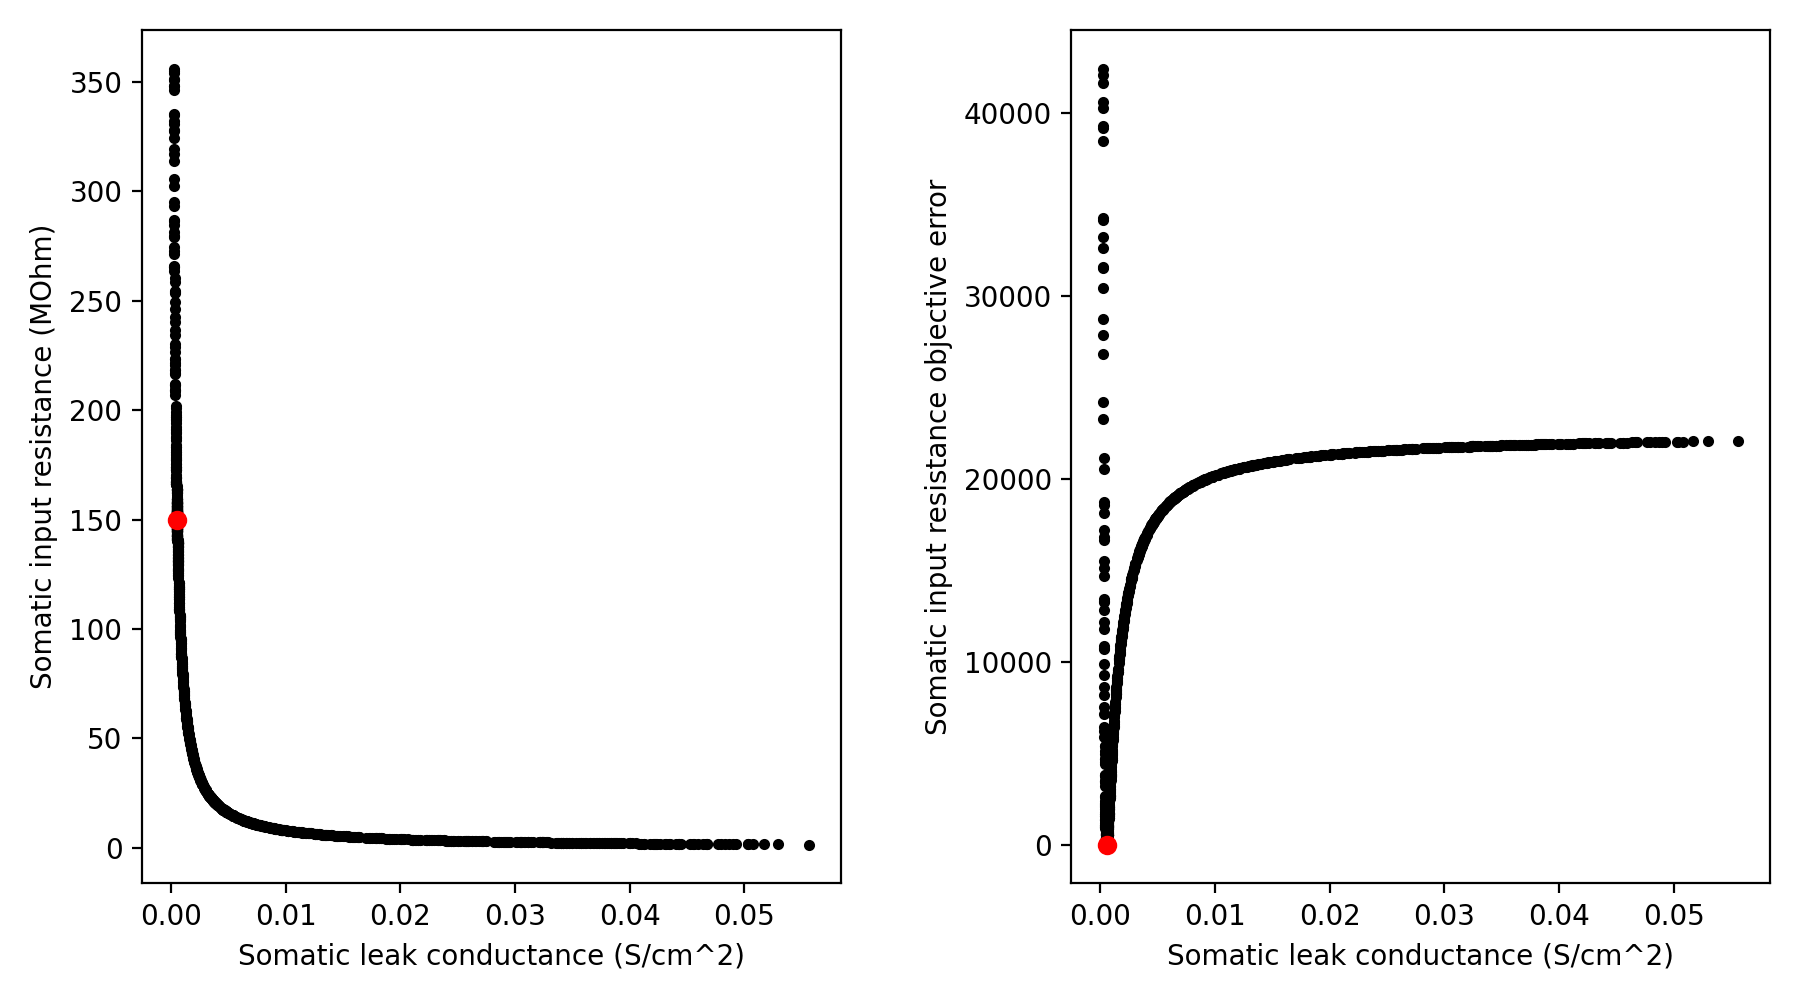

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(9., 5.))
for xi, this_sim_summary in sim_history.items():
    axes[0].scatter(xi[0], this_sim_summary['soma_R_inp'], marker='.', c='k')
    axes[1].scatter(xi[0], this_sim_summary['error'], marker='.', c='k')
axes[0].scatter(result.x[0], sim_history[tuple(result.x)]['soma_R_inp'], marker='o', c='r')
axes[1].scatter(result.x[0], result.fun, marker='o', c='r')
axes[0].set_xlabel('Somatic leak conductance (S/cm^2)')
axes[1].set_xlabel('Somatic leak conductance (S/cm^2)')
axes[0].set_ylabel('Somatic input resistance (MOhm)')
axes[1].set_ylabel('Somatic input resistance objective error')
fig.tight_layout(w_pad=3.)
fig.show()

optimal_pas_g = result.x[0]

## 5. Introduction to NMODL, the language used to specify ion channel mechanisms in NEURON

Here are the contents of the built-in NEURON mechanism defined in 'hh.mod':

    TITLE hh.mod   squid sodium, potassium, and leak channels

    COMMENT
     This is the original Hodgkin-Huxley treatment for the set of sodium, 
      potassium, and leakage channels found in the squid giant axon membrane.
      ("A quantitative description of membrane current and its application 
      conduction and excitation in nerve" J.Physiol. (Lond.) 117:500-544 (1952).)
     Membrane voltage is in absolute mV and has been reversed in polarity
      from the original HH convention and shifted to reflect a resting potential
      of -65 mV.
     Remember to set celsius=6.3 (or whatever) in your HOC file.
     See squid.hoc for an example of a simulation using this model.
     SW Jaslove  6 March, 1992
    ENDCOMMENT

    UNITS {
            (mA) = (milliamp)
            (mV) = (millivolt)
        (S) = (siemens)
    }

    NEURON {
            SUFFIX hh
            USEION na READ ena WRITE ina
            USEION k READ ek WRITE ik
            NONSPECIFIC_CURRENT il
            RANGE gnabar, gkbar, gl, el, gna, gk
            GLOBAL minf, hinf, ninf, mtau, htau, ntau
    }

    PARAMETER {
            gnabar = .12 (S/cm2)	<0,1e9>
            gkbar = .036 (S/cm2)	<0,1e9>
            gl = .0003 (S/cm2)	<0,1e9>
            el = -54.3 (mV)
    }

    STATE {
            m h n
    }

    ASSIGNED {
            v (mV)
            celsius (degC)
            ena (mV)
            ek (mV)

        gna (S/cm2)
        gk (S/cm2)
            ina (mA/cm2)
            ik (mA/cm2)
            il (mA/cm2)
            minf hinf ninf
        mtau (ms) htau (ms) ntau (ms)
    }
    
    BREAKPOINT {
            SOLVE states METHOD cnexp
            gna = gnabar*m*m*m*h
        ina = gna*(v - ena)
            gk = gkbar*n*n*n*n
        ik = gk*(v - ek)      
            il = gl*(v - el)
    }


    INITIAL {
        rates(v)
        m = minf
        h = hinf
        n = ninf
    }
    
    DERIVATIVE states {  
            rates(v)
            m' =  (minf-m)/mtau
            h' = (hinf-h)/htau
            n' = (ninf-n)/ntau
    }

    :LOCAL q10

    
    PROCEDURE rates(v(mV)) {  :Computes rate and other constants at current v.
                          :Call once from HOC to initialize inf at resting v.
            LOCAL  alpha, beta, sum, q10
            TABLE minf, mtau, hinf, htau, ninf, ntau DEPEND celsius FROM -100 TO 100 WITH 200

    UNITSOFF
            q10 = 3^((celsius - 6.3)/10)
                    :"m" sodium activation system
            alpha = .1 * vtrap(-(v+40),10)
            beta =  4 * exp(-(v+65)/18)
            sum = alpha + beta
        mtau = 1/(q10*sum)
            minf = alpha/sum
                    :"h" sodium inactivation system
            alpha = .07 * exp(-(v+65)/20)
            beta = 1 / (exp(-(v+35)/10) + 1)
            sum = alpha + beta
        htau = 1/(q10*sum)
            hinf = alpha/sum
                    :"n" potassium activation system
            alpha = .01*vtrap(-(v+55),10) 
            beta = .125*exp(-(v+65)/80)
        sum = alpha + beta
            ntau = 1/(q10*sum)
            ninf = alpha/sum
    }

    FUNCTION vtrap(x,y) {  :Traps for 0 in denominator of rate eqns.
            if (fabs(x/y) < 1e-6) {
                    vtrap = y*(1 - x/y/2)
            }else{
                    vtrap = x/(exp(x/y) - 1)
            }
    }

    UNITSON

This mechanism specifies 3 distinct ion channels in one!
 - Passive leak conductance
 - Hodkin-Huxley-style sodium conductance with voltage-dependent activation gate and voltage-dependent inactivation gate
 - Hodkin-Huxley-style delayed rectifier potassium conductance with voltage-dependent activation gate
 
## Exercise: Let's plot the voltage dependence of the "m", "h", and "n" gates:
 - Use the rates(v) function defined in the .mod file to create python functions that plot minf, hinf, and ninf as functions of v

In [ ]:
q10 = 1.  # For this purpose, temperature = 6.3 and the temperature sensitivity factor = 1.

def vtrap(x, y):
    if abs(x/y) < 1e-6:
        return y * (1. - x / y / 2.)
    else:
        return x / (np.exp(x / y) - 1.)

In [ ]:
def mtau(v):
    alpha = .1 * vtrap(-(v+40), 10)
    beta =  4 * np.exp(-(v+65)/18)
    this_sum = alpha + beta
    return 1. / (q10 * this_sum)

def minf(v):
    alpha = .1 * vtrap(-(v+40), 10)
    beta =  4 * np.exp(-(v+65)/18)
    this_sum = alpha + beta
    return alpha / this_sum

def htau(v):
    # fill in
    return

def hinf(v):
    # fill in
    return

def ntau(v):
    # fill in
    return
    
def ninf(v):
    # fill in
    return

In [ ]:
v = np.arange(-100., 100., 0.1)

plt.figure()
plt.plot(v, minh(v))

If a function expects a float, you can pass in a vector and get back a vector if you wrap it with np.vectorize()!

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(9., 5.))
axes[0].plot(v, np.vectorize(mtau)(v))
axes[0].set_xlabel('Voltage (mV)')
axes[0].set_ylabel('Time constant (ms)')
axes[0].set_title('Na activation gate time constant')
axes[1].plot(v, np.vectorize(minf)(v))
axes[1].set_xlabel('Voltage (mV)')
axes[1].set_ylabel('Permeability factor')
axes[1].set_title('Na activation gate state')
fig.tight_layout(w_pad=3.)
fig.show()

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(9., 5.))
axes[0].plot(v, np.vectorize(mtau)(v), label='Na activation')
axes[0].plot(v, np.vectorize(htau)(v), label='Na inactivation')
axes[0].set_xlabel('Voltage (mV)')
axes[0].set_ylabel('Time constant (ms)')
axes[0].set_title('Time constant')
axes[1].plot(v, np.vectorize(minf)(v), label='Na activation')
axes[1].plot(v, np.vectorize(hinf)(v), label='Na inactivation')
axes[1].set_xlabel('Voltage (mV)')
axes[1].set_ylabel('Permeability factor')
axes[1].set_title('State')
axes[0].legend(loc='best', frameon=False)
fig.tight_layout(w_pad=3.)
fig.show()

## 6. Insert "active" voltage-dependent "Hodgkin-Huxley" ion channels

In [ ]:
soma = h.Section()
soma.L = 20.
soma.diam = 20.
soma.insert('hh')

h.tstop = 600.
v_init = -65.
h.v_init = v_init

t = h.Vector()
soma_voltage = h.Vector()
t.record(h._ref_t, h.dt)  # record the time base
soma_voltage.record(soma(0.5)._ref_v, h.dt)  # record the voltage across the membrane in a segment

step_current_stim = h.IClamp(soma(0.5))
step_current_stim.amp = 0.1  # amplitude in nanoAmps
step_current_stim.dur = 200.  # duration in milliseconds
step_current_stim.delay = 200.  # start time of current injection

In [ ]:
h.run()
plt.figure()
plt.plot(t, soma_voltage)
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (ms)')

In [ ]:
hh_mech = soma(0.5).hh

In [ ]:
hh_mech.   # tab to complete

Recordings can be established for the 3 ion channel conductances:

In [ ]:
gl = h.Vector()
gl.record(soma(0.5).hh._ref_gl, h.dt)
gna = h.Vector()
gna.record(soma(0.5).hh._ref_gna, h.dt)
gk = h.Vector()
gk.record(soma(0.5).hh._ref_gk, h.dt)

In [ ]:
h.run()
fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(t, gl, label='gl')
axes[0].plot(t, gna, label='gna')
axes[0].plot(t, gk, label='gk')
axes[0].legend(loc='best', frameon=False)
axes[1].plot(t, soma_voltage, label='soma vm')
axes[1].legend(loc='best', frameon=False)
axes[0].set_ylabel('Conductance (S/cm^2)')
axes[1].set_ylabel('Voltage (mV)')
axes[1].set_xlabel('Time (ms)')

In [ ]:
gkbar0 = soma(0.5).hh.gkbar
gnabar0 = soma(0.5).hh.gnabar
gl0 = soma(0.5).hh.gl
T0 = h.celsius

In [ ]:
spike_times = h.Vector()
spike_detector = h.NetCon(soma(0.5)._ref_v, None, sec=soma)
spike_detector.delay = 0.  # ms
spike_detector.threshold = -10.  # mV
spike_detector.record(spike_times)

In [ ]:
step_current_stim.amp = 0.5
test_amp_vals = [0.05 * i for i in range(6)]
fig, axes = plt.subplots(len(test_amp_vals))
for i, amp in enumerate(test_amp_vals):
    step_current_stim.amp = amp
    h.run()
    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))
    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))
    axes[i].legend(loc='best', frameon=False)
fig.show()

## 7. Challenge 1: Measure and plot an f-I curve

 - The relationship between input current (I) and output firing rate (f)
 - Make sure to only count spikes within the window of the step current injection

## 8. Challenge 2: Simultaneously optimize both somatic input resistance and the slope of the f-I curve.

 - Hint: x0 = [gl0, gnabar0, gkbar0]
 - How to construct a single error value that reflects 2 objectives?
 - Target f-I slope should be ~10 Hz / 0.05 nA
 - f-I slope should really only be calculated from values of I that produced more than one spike. ___/

Some papers to read for next week:

 - Stuart, Greg, and Nelson Spruston. "Determinants of voltage attenuation in neocortical pyramidal neuron dendrites." Journal of Neuroscience 18.10 (1998): 3501-3510. https://www.jneurosci.org/content/18/10/3501.full
 - Hoffman, Dax A., et al. "K+ channel regulation of signal propagation in dendrites of hippocampal pyramidal neurons." Nature 387.6636 (1997): 869-875. https://www.nature.com/articles/43119
 - Royeck, Michel, et al. "Role of axonal NaV1. 6 sodium channels in action potential initiation of CA1 pyramidal neurons." Journal of neurophysiology 100.4 (2008): 2361-2380.
 https://journals.physiology.org/doi/full/10.1152/jn.90332.2008